## Gradio Pets

In [1]:
!pip install timm
from fastai.vision.all import *
import timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# # Path to the "dataset" directory
path = '/content/drive/MyDrive/fast_ai_experiments/3_neural_net_foundations/hot_dog_not_hotdog/dataset/'

Mounted at /content/drive


In [3]:
import os

# Define the parent path to the dataset directory
parent_path = '/content/drive/MyDrive/fast_ai_experiments/3_neural_net_foundations/hot_dog_not_hotdog/dataset/'

# List of subdirectories
subdirectories = ['hot-dog', 'not-hot-dog']

# Iterate through subdirectories
for subdir in subdirectories:
    subdir_path = os.path.join(parent_path, subdir)

    # List all files in the subdirectory
    file_list = os.listdir(subdir_path)

    # Iterate through the files and rename them with a numbered sequence
    for i, filename in enumerate(file_list, start=1):
        if filename.endswith(".jpg"):
            new_filename = f"{subdir}_{i}.jpg"
            os.rename(os.path.join(subdir_path, filename), os.path.join(subdir_path, new_filename))



In [4]:
# Creating ImageDataLoaders
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224),
)

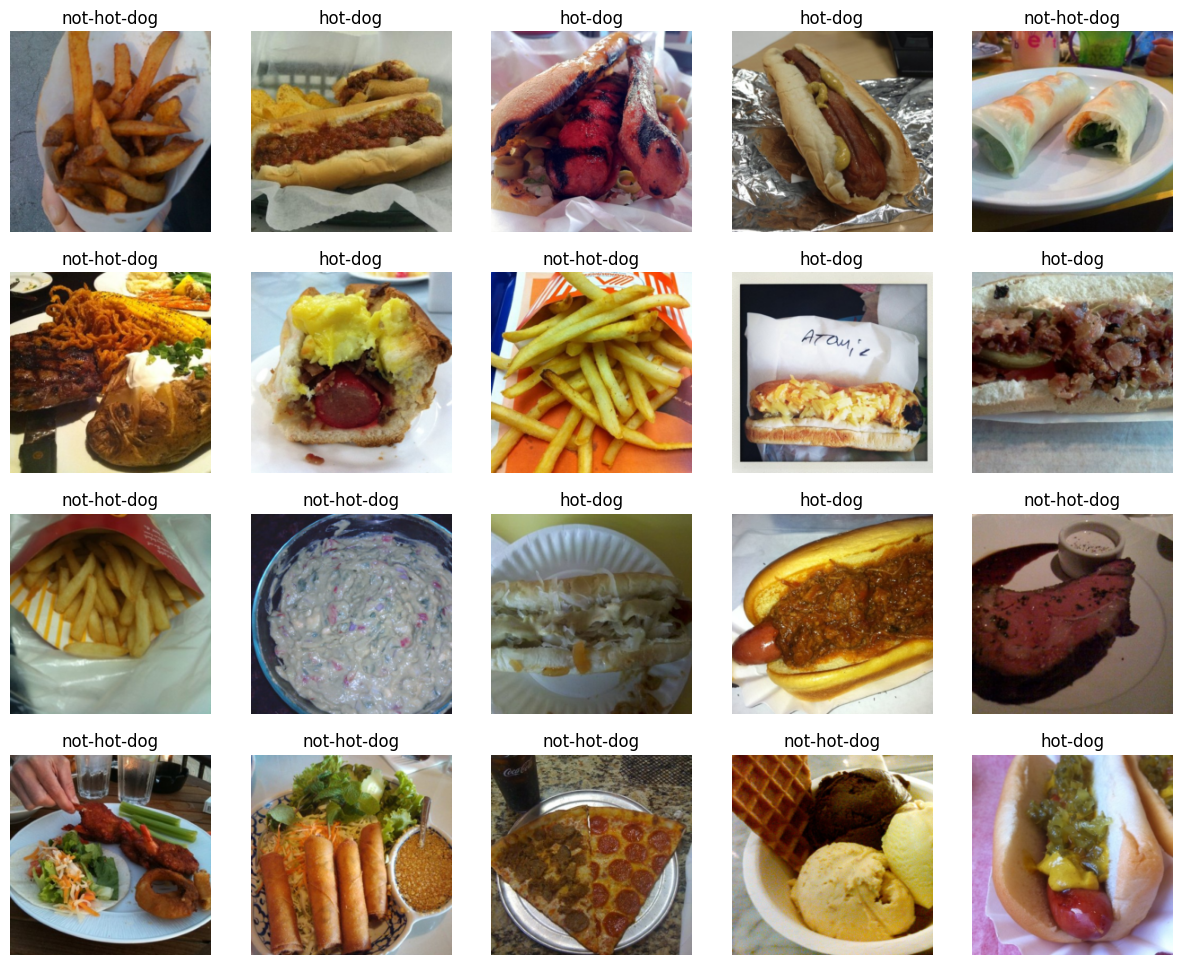

In [5]:
dls.show_batch(max_n=20)

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 94.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.890783,0.328621,0.130653,02:10


epoch,train_loss,valid_loss,error_rate,time
0,0.457683,0.231882,0.105528,00:13
1,0.270772,0.355318,0.110553,00:08
2,0.187048,0.347728,0.105528,00:10


We could try a better model, based on [this analysis](https://www.kaggle.com/code/jhoward/which-image-models-are-best/). The convnext models work great!

In [7]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [8]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,error_rate,time
0,0.507469,0.354891,0.090452,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.174055,0.094325,0.040201,00:08
1,0.131543,0.100523,0.045226,00:10
2,0.093354,0.084719,0.045226,00:09


In [9]:
learn.export('model.pkl')